In [1]:
# -*- coding: utf8

from scipy import stats as ss

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 17 - Verossimilhança

Continuando da aula passada. Vamos ver mais uma forma de entender um modelo de regressão linear. Lembre-se até agora falamos de correlação e covariância cobrindo os seguintes tópicos:

1. Covariância
1. Coeficiente de Pearson (Covariância Normalizada)
1. Coeficiente de Pearson como sendo a fração do desvio de y capturado por x
1. Mínimos Quadrados

Todos os passos acima chegam no mesmo local de traçar a "melhor" reta no gráfico de dispersão. Melhor aqui significa a reta que que minimiza o erro abaixo:

$$\Theta = [\alpha, \beta]$$
$$L(\Theta) = \sum_i (y_i - \hat{y}_i)^2$$
$$L(\Theta) = \sum_i (y_i - \beta x_i + \alpha)^2$$

Chegamos em:

\begin{align}
 \alpha & = \bar{y} - \beta\,\bar{x}, \\[5pt]
  \beta &= \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } \\[6pt]
            &= \frac{ \operatorname{Cov}(x, y) }{ \operatorname{Var}(x) } \\[5pt]
            &= r_{xy} \frac{s_y}{s_x}. \\[6pt]
\end{align}

## Visão probabílistica

Vamos aprender uma última forma de pensar na regressão. Em particular, vamos fazer uso de uma visão probabílistica. Para tal, exploraremos o caso dos apartamentos de BH abaixo.

Inicialmente, vamos observar os dados além do resultado da melhor regressão.

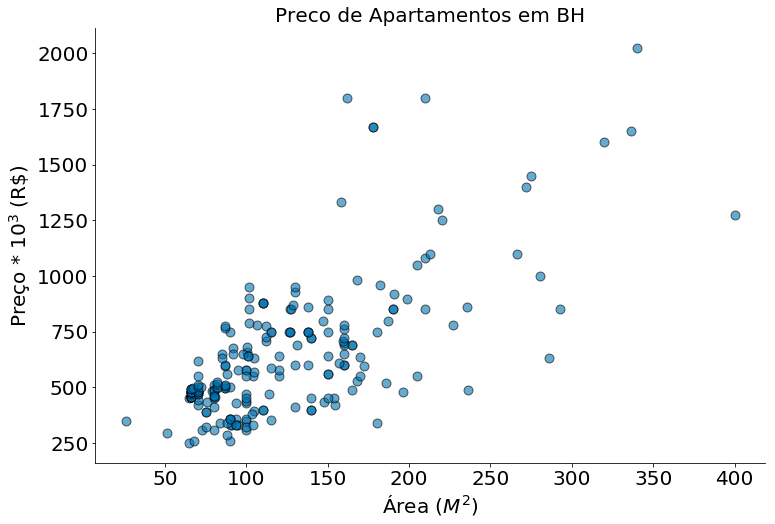

In [4]:
df = pd.read_csv('aptosBH.txt', index_col=0)
df['preco'] = df['preco'] / 1000
plt.scatter(df['area'], df['preco'], edgecolors='k', s=80, alpha=0.6)
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')
despine()

O seaborn tem uma função regplot que plota a melhor reta além de um IC (estmado via bootstrap -- aula passada).

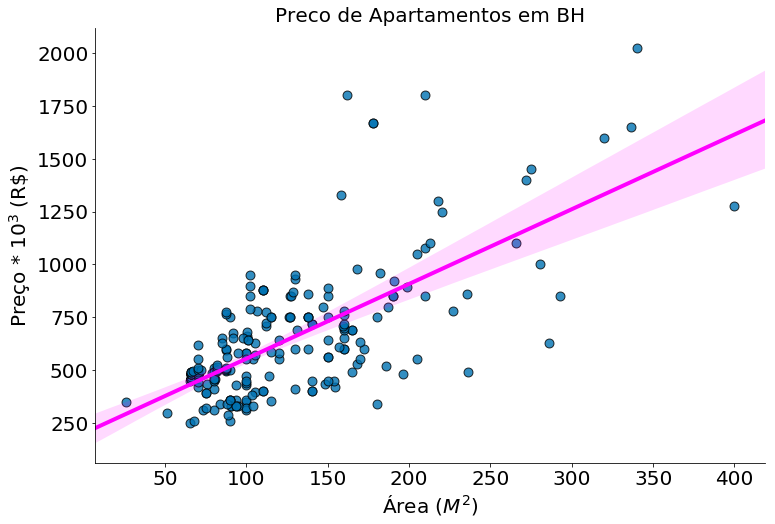

In [5]:
sns.regplot(x='area', y='preco', data=df, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')
despine()

A reta pode ser recuperada usando scipy.

In [6]:
model = ss.linregress(df['area'], df['preco'])
# beta = slope
# alpha = intercept
model 

LinregressResult(slope=3.535719156333653, intercept=200.52361368989432, rvalue=0.69460563796064556, pvalue=1.917920339304021e-32, stderr=0.250321067300947)

Usando esta reta podemos prever o preço de um apartamento usando apenas a área do mesmo.

In [7]:
beta = model.slope
alpha = model.intercept
novo_apt_area = 225
preco = beta * novo_apt_area + alpha
preco

996.0604238649662

Ou seja, quando um apartamento de 225m2 entra no mercado o mesmo custa em torno de 1M de reais.

## Erros Normais

Agora, será que conseguimos chegar no mesmo pensando na regressão como um modelo probabilístico?

[Discussão nos Slides](https://docs.google.com/presentation/d/1nSmN9ch1x6ABczaAzB292XgTqbXcIo1UIX1xjCrF1d8/edit#slide=id.g5a114266c3_0_26)

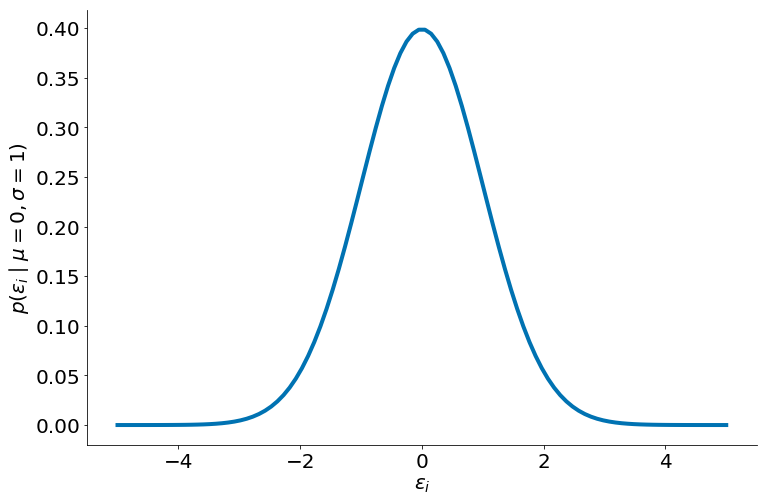

In [8]:
x = np.linspace(-5, 5, 100)
plt.plot(x, ss.distributions.norm.pdf(x, scale=1))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma=1)$')

despine()

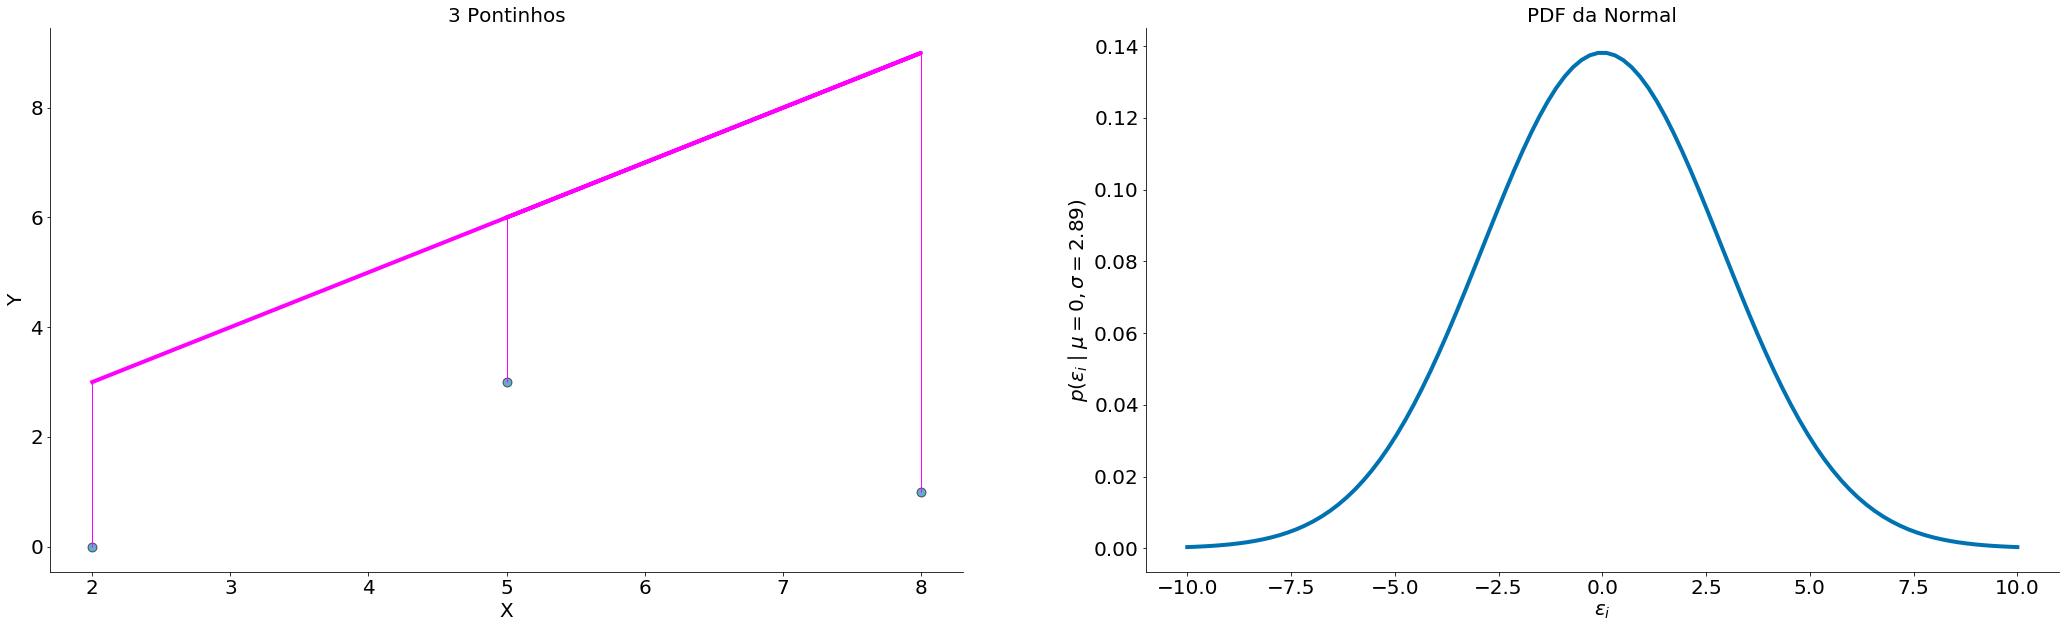

In [9]:
beta = 1
alpha = 1

fig = plt.figure(figsize=(36, 10))

x = np.array([2, 8, 5])
y = np.array([0, 1, 3])

plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('3 Pontinhos')
plt.ylabel(r'Y')
plt.xlabel(r'X')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-10, 10, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

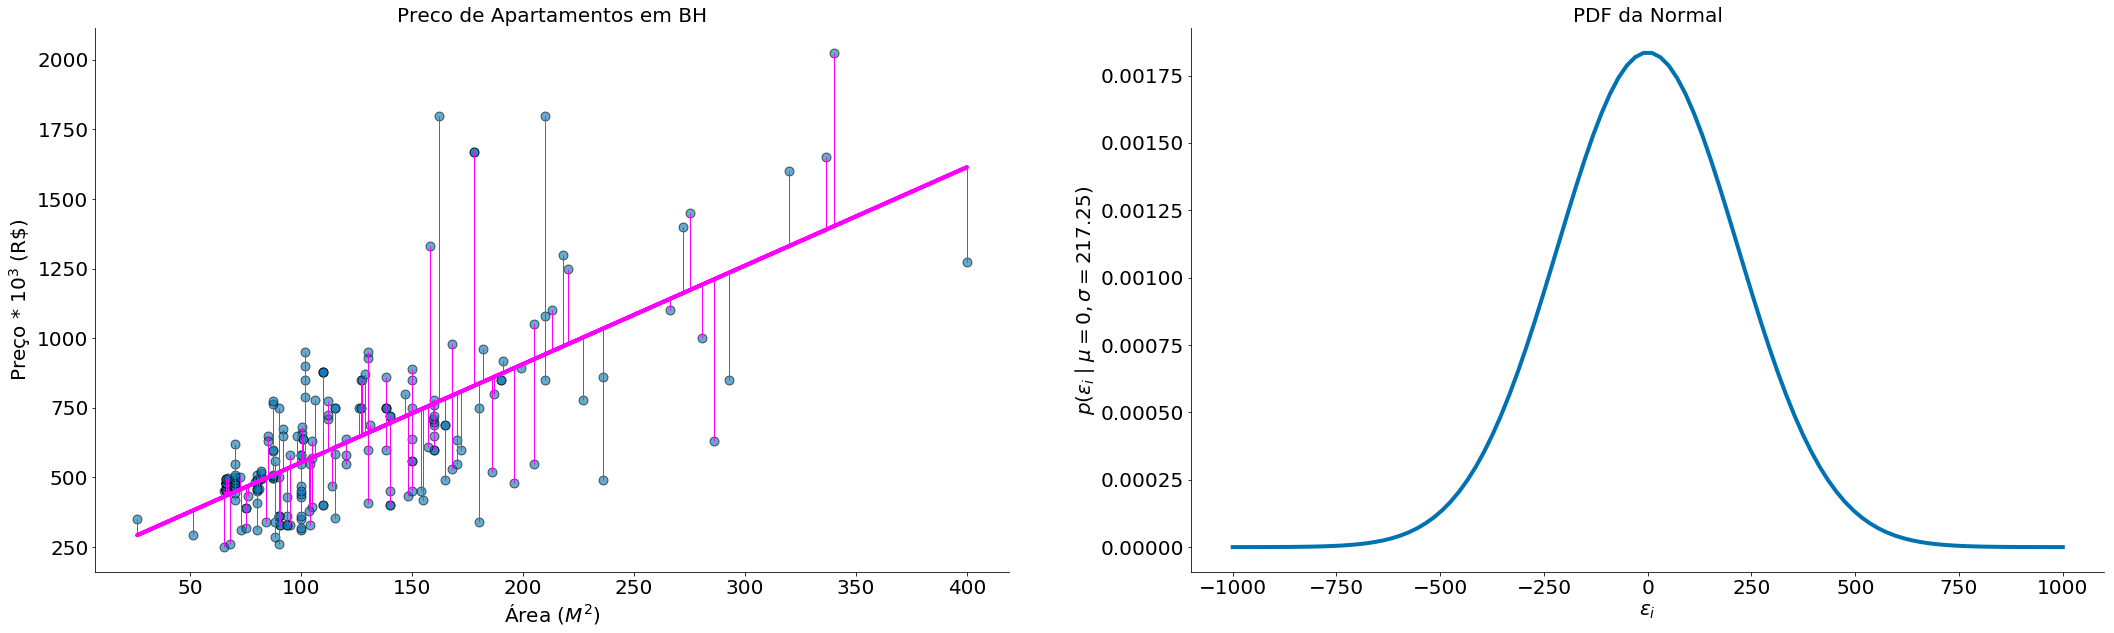

In [10]:
beta = 3.535719156333653
alpha = 200.52361368989432

fig = plt.figure(figsize=(36, 10))

x = df['area']
y = df['preco']

plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-1000, 1000, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

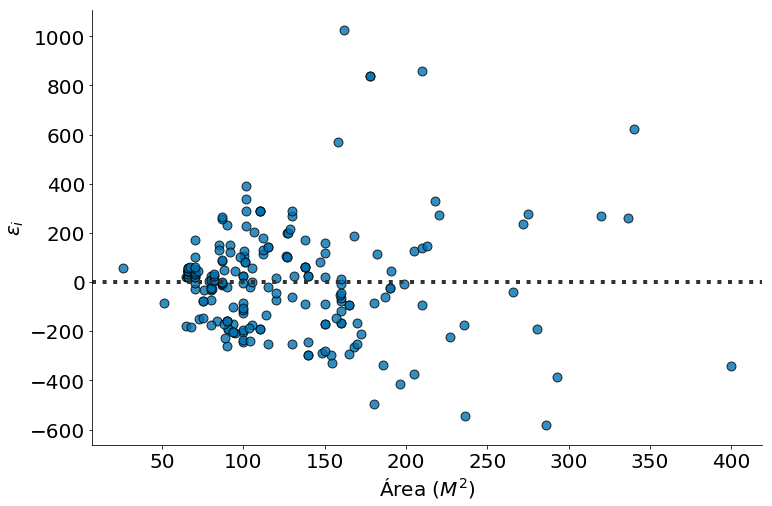

In [11]:
sns.residplot(x='area', y='preco', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
plt.xlabel(r'Área ($M^2$)')
despine()

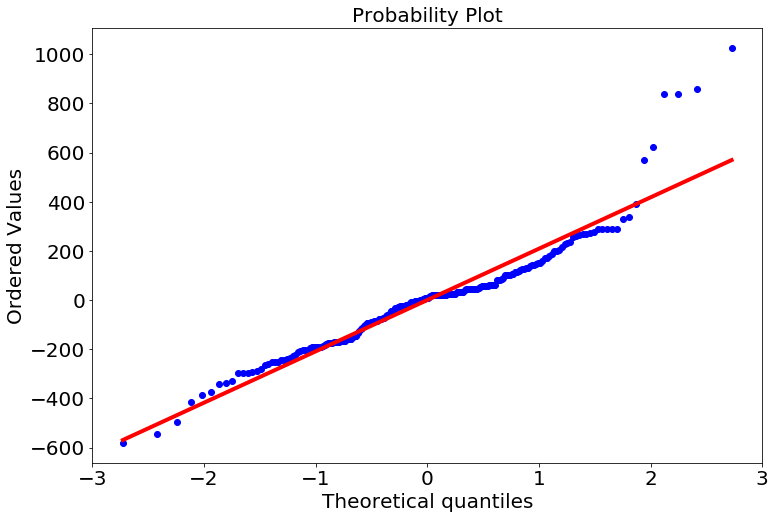

In [12]:
ss.probplot(y - y_bar, plot=plt.gca());

## Close Nova Dataset

Abaixo temos a dispersão dos dados

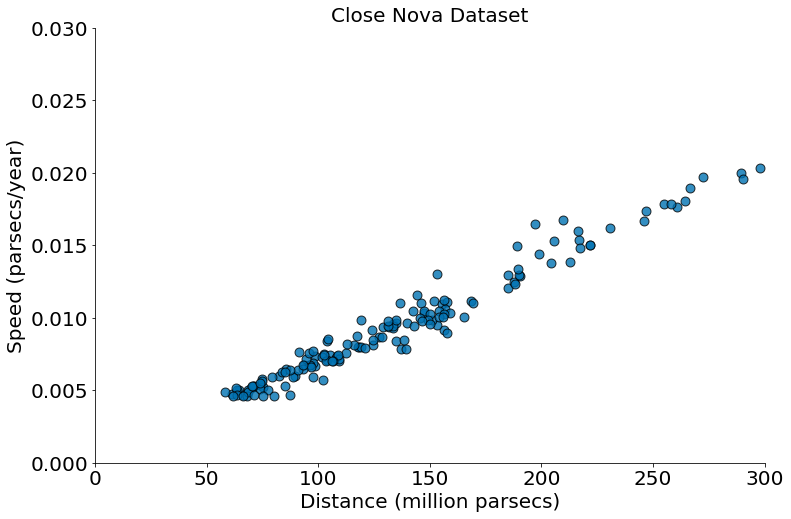

In [13]:
df = pd.read_csv('close_novas.csv')
x = df.values[:, 0]
y = df.values[:, 1]

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.xlim((0, 300))
plt.ylim((0, 0.03))
plt.title('Close Nova Dataset')
despine()

In [14]:
1e6 / (ss.pearsonr(x, y)[0] * y.std(ddof=1) / x.std(ddof=1))

14612822334.220749

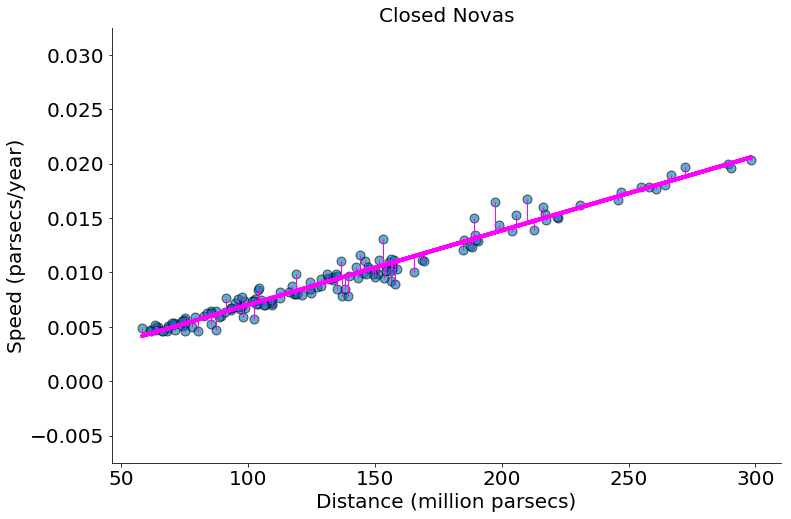

In [15]:
x = df['Distance (million parsecs)']
y = df['Speed (parsecs/year)']

model = ss.linregress(x, y)
beta = model.slope
alpha = model.intercept

plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Closed Novas')
plt.ylabel(r'Speed (parsecs/year)')
plt.xlabel(r'Distance (million parsecs)')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

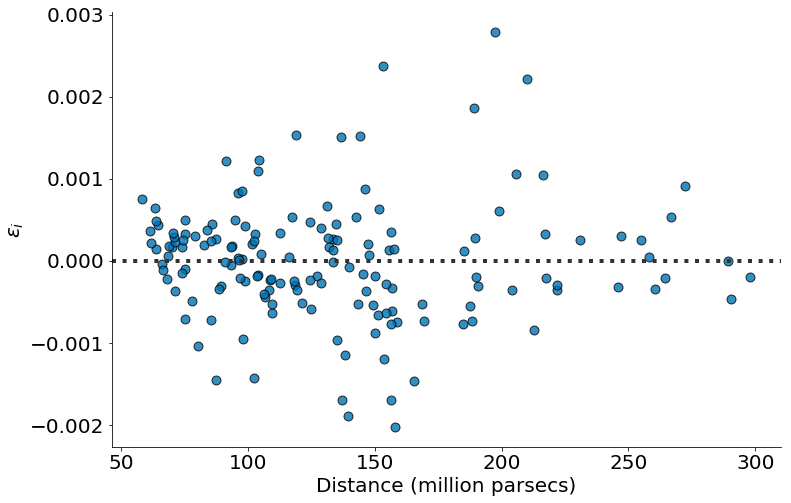

In [16]:
sns.residplot(x='Distance (million parsecs)', y='Speed (parsecs/year)', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
despine()

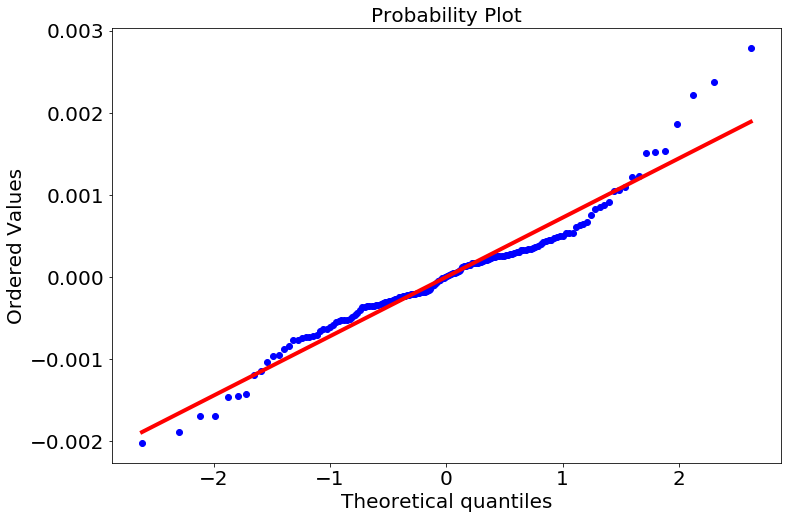

In [17]:
ss.probplot(y - y_bar, plot=plt);

In [18]:
import statsmodels.api as sm

stocks = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
          'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
          'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
          'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
          'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
         }

df = pd.DataFrame(stocks, columns=['Year','Month', 'Interest_Rate', 'Unemployment_Rate', 'Stock_Index_Price'])

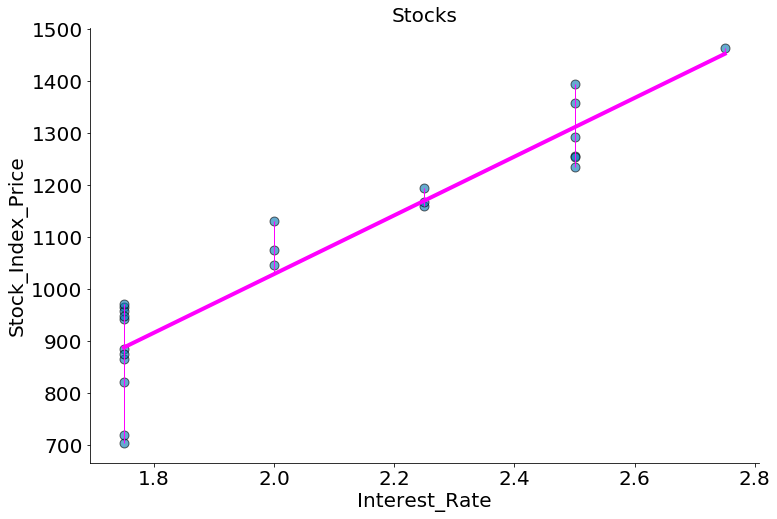

In [19]:
x = df['Interest_Rate']
y = df['Stock_Index_Price']
model = ss.linregress(x, y)
beta = model.slope
alpha = model.intercept

plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Stocks')
plt.ylabel(r'Stock_Index_Price')
plt.xlabel(r'Interest_Rate')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

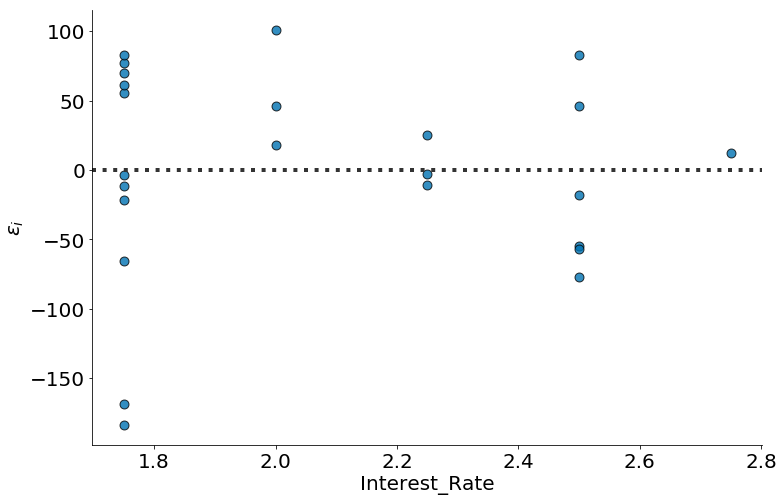

In [20]:
sns.residplot(x='Interest_Rate', y='Stock_Index_Price', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
despine()

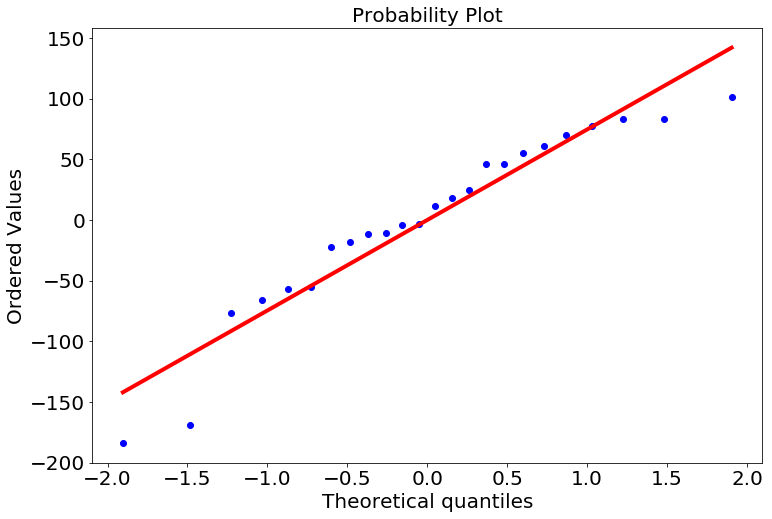

In [21]:
ss.probplot(y - y_bar, plot=plt);

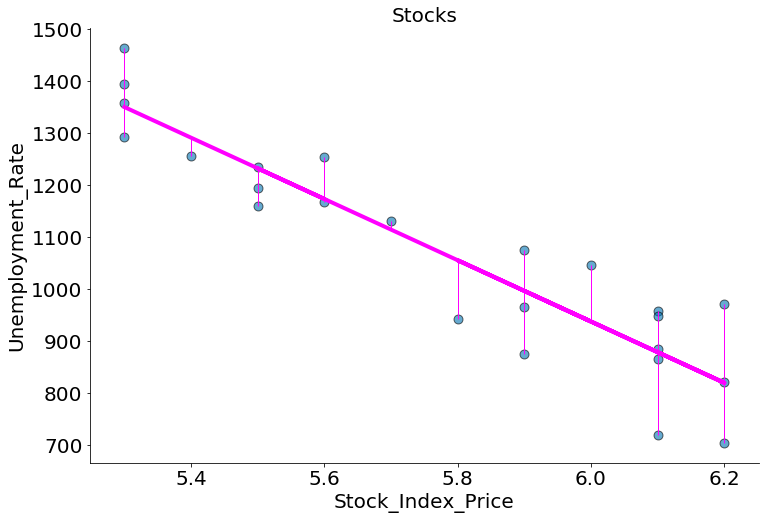

In [22]:
x = df['Unemployment_Rate']
y = df['Stock_Index_Price']
model = ss.linregress(x, y)
beta = model.slope
alpha = model.intercept

plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Stocks')
plt.ylabel(r'Unemployment_Rate')
plt.xlabel(r'Stock_Index_Price')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

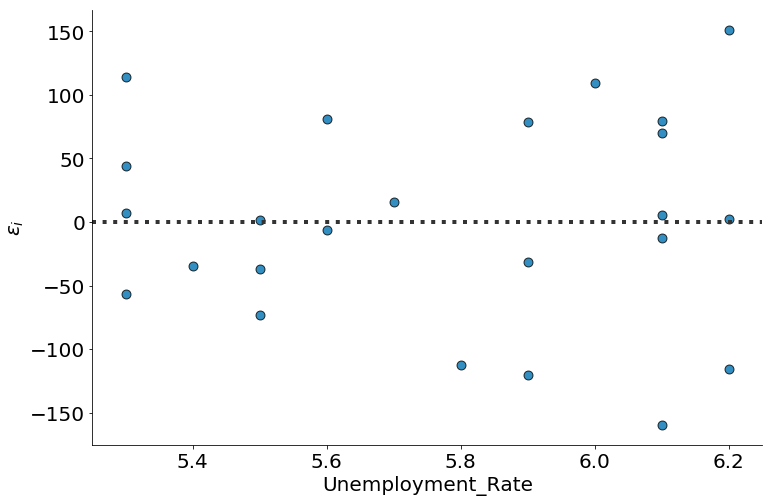

In [23]:
sns.residplot(x='Unemployment_Rate', y='Stock_Index_Price', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
despine()

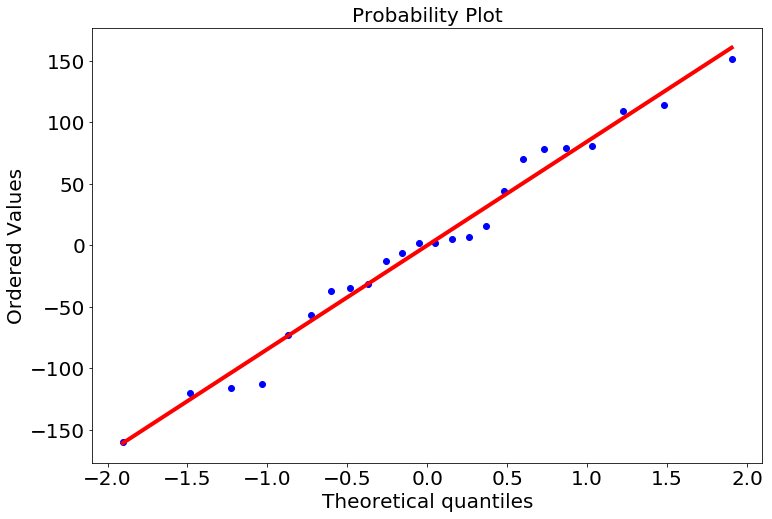

In [24]:
ss.probplot(y - y_bar, plot=plt);

In [25]:
df = pd.read_csv('http://www.statsci.org/data/oz/dugongs.txt', sep='\t')
df

,Age,Length
0,1.0,1.80
1,1.5,1.85
2,1.5,1.87
3,1.5,1.77
4,2.5,2.02
5,4.0,2.27
6,5.0,2.15
7,5.0,2.26
8,7.0,2.35
9,8.0,2.47


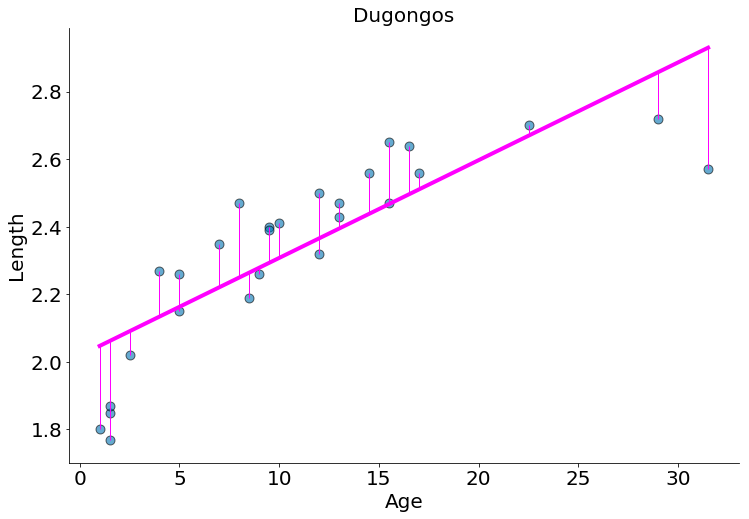

In [26]:
x = df['Age']
y = df['Length']
model = ss.linregress(x, y)
beta = model.slope
alpha = model.intercept

plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Dugongos')
plt.ylabel(r'Length')
plt.xlabel(r'Age')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

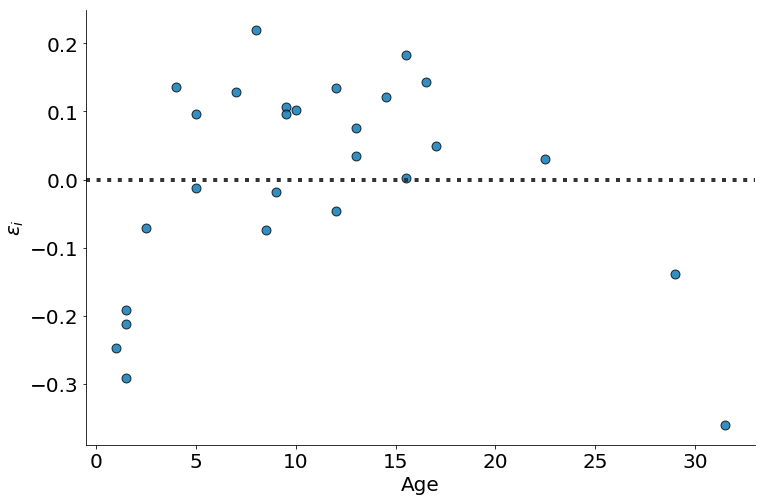

In [27]:
sns.residplot(x='Age', y='Length', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
despine()

In [28]:
df = pd.read_csv('http://www.statsci.org/data/oz/dugongs.txt', sep='\t')
y, x = df.values.T